In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import fancyimpute
#import pandas_profiling


from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
njobs = -1
randomState = 0


In [2]:
train_x = pd.read_csv('iowa_housing_test_data/train_x_prep.csv')
test = pd.read_csv('iowa_housing_test_data/test_prep.csv')
train_y = pd.read_csv('iowa_housing_test_data/train_y_prep.csv', header = None)


train_y = train_y.values.ravel()

In [3]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_x.values)
    rmse= np.sqrt(-cross_val_score(model, train_x.values, train_y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [4]:
def kaggle(x):
    # Input x - the model prediction
    # returns dataframe of sales price and Id ready to be written to
    # csv for kaggle competition submission.
    return(pd.DataFrame({'Id': (np.arange(len(test_x)) + 1461),
                         'SalePrice': np.exp(x)}))

# regressions

## lasso

In [5]:
train_y.shape

(1457,)

In [6]:
alphas = list(np.arange(0.0005,0.001,0.0001))
#initrsq = 1
print ("\nLasso Regression: Best Parameters\n")
for alph in alphas:
    lasso_reg = Lasso(alpha=alph) 
    score = rmsle_cv(lasso_reg)
    print("\nLasso score: {:.4f} {:.4f} ({:.4f})\n".format(alph, score.mean(), score.std()))
    
    



Lasso Regression: Best Parameters


Lasso score: 0.0005 0.1275 (0.0144)


Lasso score: 0.0006 0.1272 (0.0144)


Lasso score: 0.0007 0.1272 (0.0144)


Lasso score: 0.0008 0.1274 (0.0144)


Lasso score: 0.0009 0.1277 (0.0145)



In [7]:
lasso = Lasso(alpha = 0.0007)
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1272 (0.0144)



In [8]:
model_lasso = LassoCV(alphas = alphas, cv = 5).fit(train_x, train_y)
score = rmsle_cv(model_lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1273 (0.0144)



In [9]:
np.round(model_lasso.alpha_, 4)

0.0007

In [10]:
coef = pd.Series(model_lasso.coef_, index = train_x.columns)

In [11]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) 
      + " variables")

Lasso picked 74 variables and eliminated the other 113 variables


In [12]:
imp_coef = pd.concat([coef.sort_values().head(25),
                     coef.sort_values().tail(25)])

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

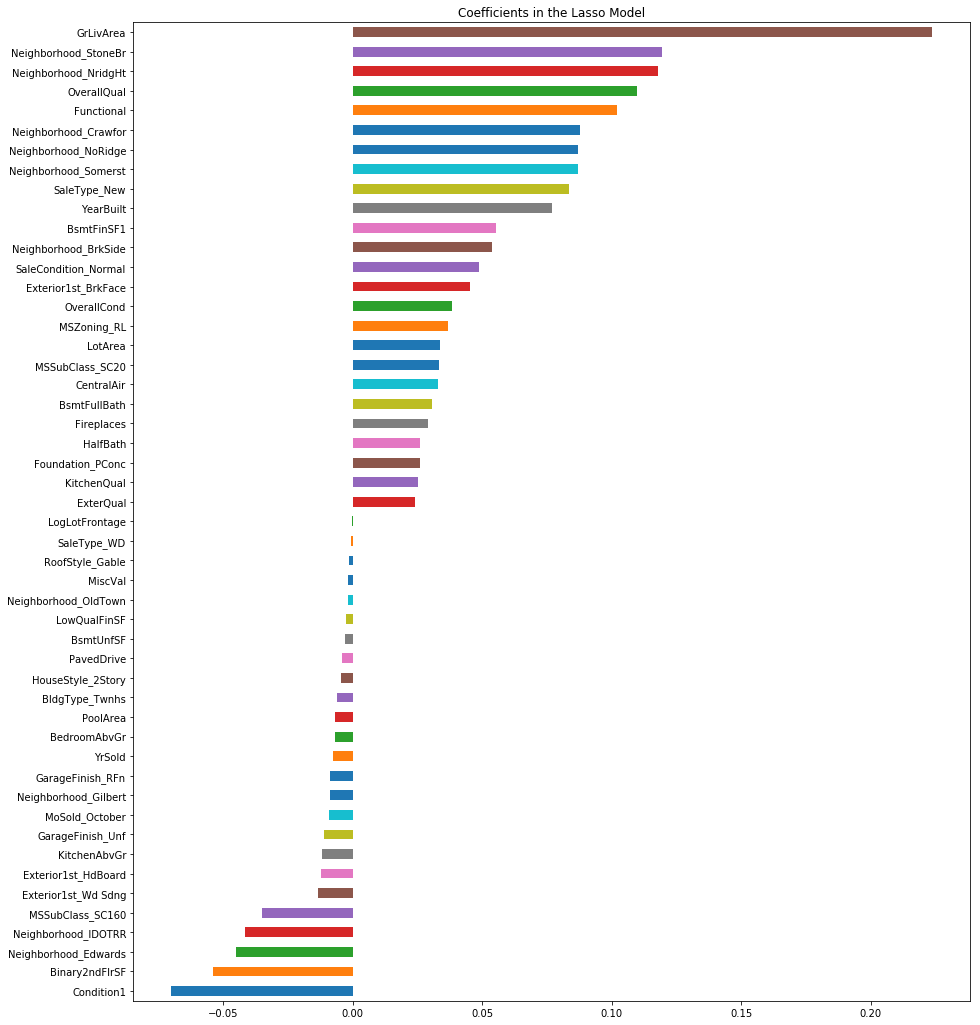

In [13]:
imp_coef.plot(kind = "barh", figsize = (15,18))
plt.title("Coefficients in the Lasso Model")

# ridge

In [14]:
alphas = list(np.arange(10,11,0.1))
#initrsq = 1
print ("\nRidge Regression: Best Parameters\n")
for alph in alphas:
    ridge_reg = Ridge(alpha=alph) 
    score = rmsle_cv(ridge_reg)
    print("\nRidge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Ridge Regression: Best Parameters


Ridge score: 0.1288 (0.0149)


Ridge score: 0.1288 (0.0149)


Ridge score: 0.1288 (0.0149)


Ridge score: 0.1288 (0.0149)


Ridge score: 0.1288 (0.0149)


Ridge score: 0.1288 (0.0149)


Ridge score: 0.1288 (0.0149)


Ridge score: 0.1288 (0.0149)


Ridge score: 0.1288 (0.0149)


Ridge score: 0.1288 (0.0148)



# elasticnet

In [15]:
alphas = list(np.arange(0.001,0.002,0.0001))
#initrsq = 1
print ("\nENet Regression: Best Parameters\n")
for alph in alphas:
    enet_reg = ElasticNet(alpha=alph) 
    score = rmsle_cv(enet_reg)
    print("\nEnet score: {:.4f} {:.4f} ({:.4f})\n".format(alph, score.mean(), score.std()))


ENet Regression: Best Parameters


Enet score: 0.0010 0.1275 (0.0144)


Enet score: 0.0011 0.1273 (0.0144)


Enet score: 0.0012 0.1273 (0.0144)


Enet score: 0.0013 0.1272 (0.0144)


Enet score: 0.0014 0.1273 (0.0144)


Enet score: 0.0015 0.1275 (0.0144)


Enet score: 0.0016 0.1276 (0.0144)


Enet score: 0.0017 0.1278 (0.0144)


Enet score: 0.0018 0.1279 (0.0145)


Enet score: 0.0019 0.1281 (0.0145)



# gradient boosting regression

In [16]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [17]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1261 (0.0117)



In [18]:
model_gbr = GBoost.fit(train_x.values, train_y)

In [19]:
gbr_importances = pd.Series(model_gbr.feature_importances_, index = train_x.columns)
gbr_importances.sort_values(ascending = False).head(20)

OverallQual         0.153
GrLivArea           0.138
KitchenQual         0.082
BsmtQual            0.067
LogGarageArea       0.065
YearBuilt           0.057
ExterQual           0.032
FullBath            0.030
LotArea             0.029
Fireplaces          0.027
BsmtFinSF1          0.024
HeatingQC           0.021
Log2ndFlrSF         0.020
WoodDeckSF          0.016
GarageType_Attchd   0.014
MSZoning_RM         0.014
YearRemodAdd        0.014
GarageType_Detchd   0.013
MasVnrArea          0.012
Foundation_PConc    0.011
dtype: float64

Text(0.5, 1.0, 'Variable Importance in the Gradient Boosting Regression')

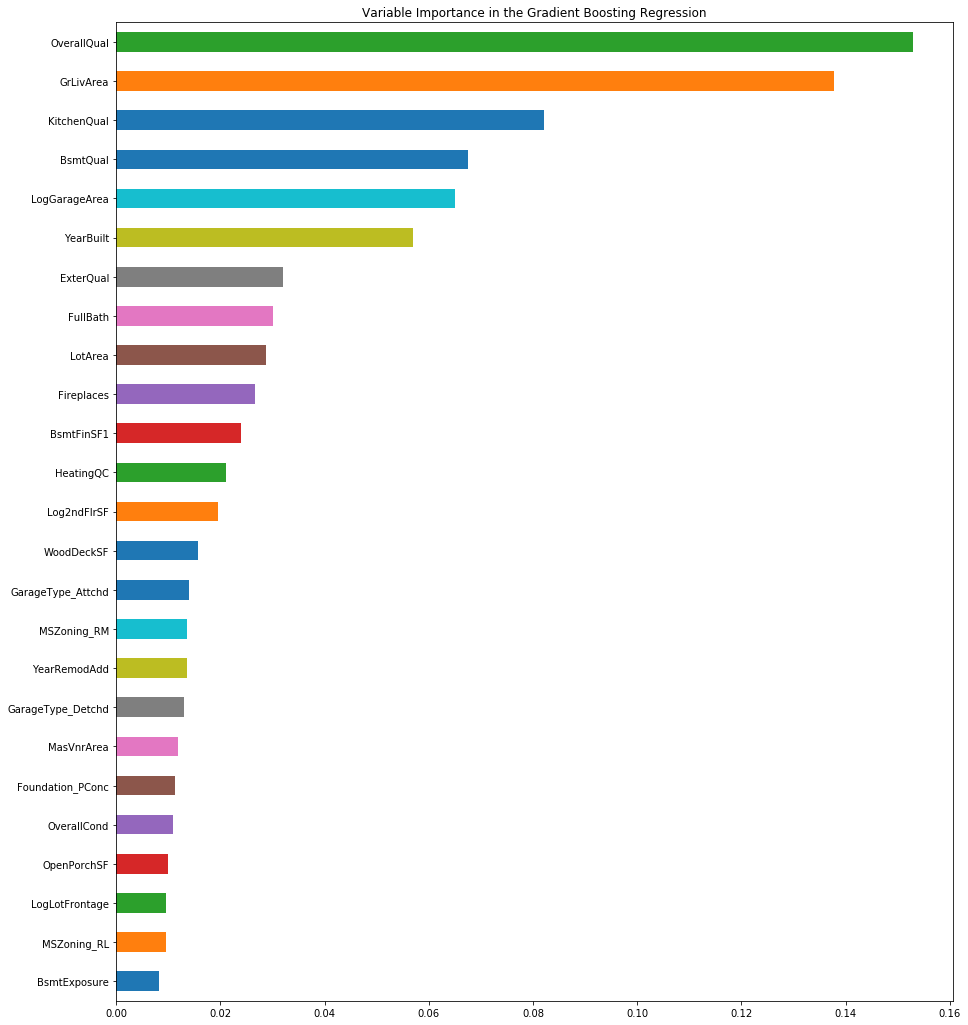

In [20]:
gbr_importances.sort_values(ascending= False).head(25).sort_values().plot(kind= "barh", figsize=(15,18))
plt.title("Variable Importance in the Gradient Boosting Regression")